<a href="https://colab.research.google.com/github/toaomalkster/conscious-calculator-notebooks/blob/feature%2F20201025-load-existing-notebooks/ConscConcluderV2_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conscious Concluder _(Theory V2)_
0.1:
* Preparatory step to just train an extremely simple feedforward network that can add two numbers.
* Plus some expirements around tuning parameters.



**App Boilerplate**

In [ ]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.3.0


# Setup Training Data

In [ ]:
data = np.random.randint(100, size=(1000, 2))
data[0:10,:]

array([[77, 27],
       [33, 50],
       [89, 65],
       [74, 58],
       [92, 42],
       [89, 65],
       [33, 47],
       [68, 48],
       [99, 64],
       [98, 74]])

In [ ]:
data_labels = (data[:,0] + data[:,1])[:,np.newaxis]
#np.concatenate((data, data_sum[:,np.newaxis]), axis=1)
data_labels[0:10,:]

array([[104],
       [ 83],
       [154],
       [132],
       [134],
       [154],
       [ 80],
       [116],
       [163],
       [172]])

In [ ]:
train_data = data[0:800,:]
train_labels = data_labels[0:800,:]
test_data = data[800:1000,:]
test_labels = data_labels[800:1000,:]
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(800, 2)
(800, 1)
(200, 2)
(200, 1)


# Setup Model

In [ ]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2,)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 1001      
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fitres = model.fit(data, data_labels, validation_split=0.2, shuffle=True, epochs=150)

Epoch 1/150
25/25 [==============================] - 0s 5ms/step - loss: 4885.4805 - val_loss: 281.5804
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 118.7800 - val_loss: 35.2050
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 11.9631 - val_loss: 5.6245
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 2.9928 - val_loss: 3.1749
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 1.8948 - val_loss: 2.2857
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 1.3347 - val_loss: 1.6924
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.9520 - val_loss: 1.2555
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6950 - val_loss: 0.9556
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4948 - val_loss: 0.6903
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.3676 - val_loss: 0.5498


In [ ]:
print(['x', 'y', 'expected', 'actual'])
print(np.concatenate((data[800:810], data_labels[800:810], model.predict(data[800:810])), axis=1))

['x', 'y', 'expected', 'actual']
[[ 24.          66.          90.          90.00248718]
 [ 45.          39.          84.          84.00266266]
 [ 12.          25.          37.          37.00056458]
 [ 31.          15.          46.          46.01594925]
 [ 49.           4.          53.          52.98983002]
 [ 60.          88.         148.         148.00093079]
 [ 99.          38.         137.         136.97975159]
 [ 32.          71.         103.         103.01485443]
 [ 78.          68.         146.         146.00621033]
 [ 70.          62.         132.         132.00631714]]


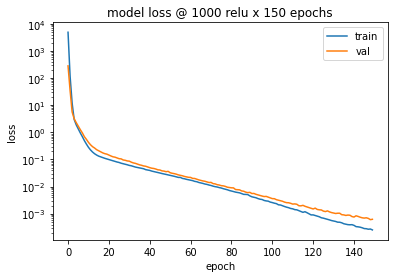

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 1000 relu x 150 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Tuning Experiments
The following shows the training histories from various experiments.

In [ ]:
model.weights

[<tf.Variable 'dense_20/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.59624577, -0.3887279 ],
        [ 0.59624535, -0.3069641 ]], dtype=float32)>,
 <tf.Variable 'dense_20/bias:0' shape=(2,) dtype=float32, numpy=array([-0.02623759,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_21/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[1.6771615 ],
        [0.07391143]], dtype=float32)>,
 <tf.Variable 'dense_21/bias:0' shape=(1,) dtype=float32, numpy=array([0.04400884], dtype=float32)>]

In [ ]:
fitres.history.keys()

dict_keys(['loss', 'val_loss'])

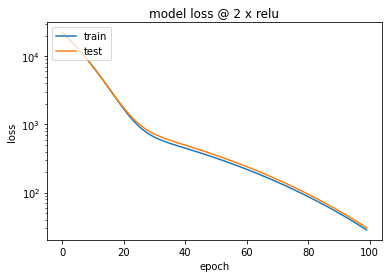

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 2 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

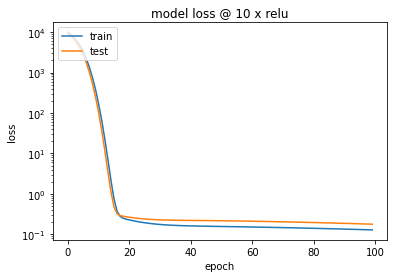

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 10 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

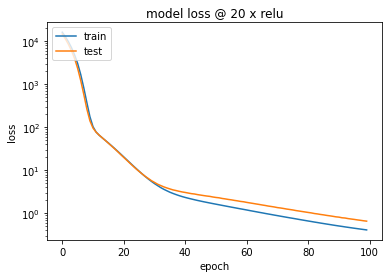

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 20 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

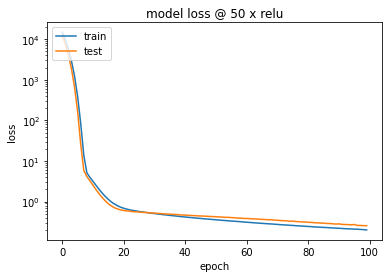

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 50 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

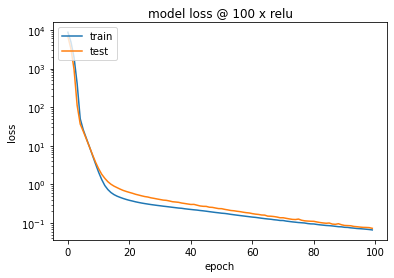

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 100 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

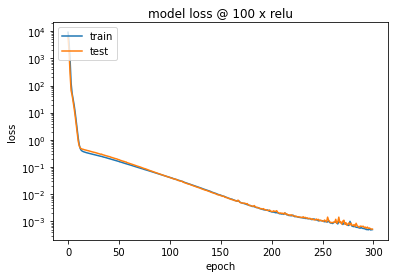

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 100 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

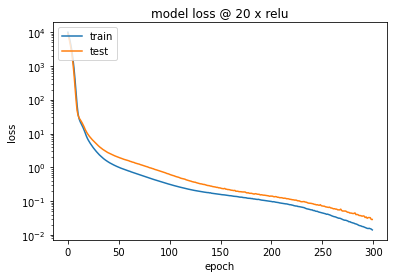

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 20 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

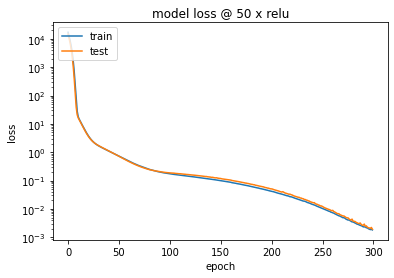

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 50 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

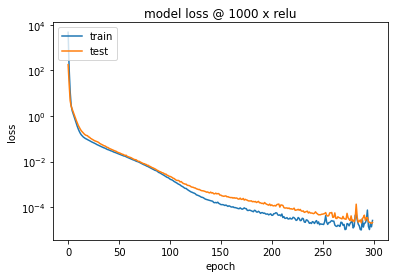

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss @ 1000 x relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()